[Traffic Sign Classification using Deep Learning](https://github.com/joshwadd/Deep-traffic-sign-classification)

In [0]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import os
import datetime
import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

%load_ext tensorboard

In [3]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')
signs = pd.read_csv('data/signnames.csv')


X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
labels_dict = signs.to_dict()['b']

In [0]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [0]:
to_categorical(y_train)[0] #=41

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
#sieć potrzebuje macierzy 
if y_train.ndim == 1 : y_train=to_categorical(y_train)
if y_test.ndim == 1 : y_test=to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [6]:
model = Sequential([
                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                    Flatten(), 
                    Dense(num_classes, activation='softmax')

])
#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)



1088/1088 [==============================] - 3s 3ms/step - loss: 14.3271 - accuracy: 0.8034


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                    Flatten(), 
                    Dense(num_classes, activation='softmax')
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callbacks = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(
      X_train,
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks = [tensorboard_callbacks]
      )
  return model

In [12]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 40.8748 - accuracy: 0.7129 - val_loss: 0.2204 - val_accuracy: 0.9466
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2062 - accuracy: 0.9500 - val_loss: 0.1058 - val_accuracy: 0.9731
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1277 - accuracy: 0.9683 - val_loss: 0.0831 - val_accuracy: 0.9803
Epoch 4/5
272/272 [==============================] - 3s 9ms/step - loss: 0.1025 - accuracy: 0.9751 - val_loss: 0.0685 - val_accuracy: 0.9835
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0810 - accuracy: 0.9801 - val_loss: 0.0717 - val_accuracy: 0.9834


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)


In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [13]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),
                     
                     Flatten(), 
                     
                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(num_classes, activation='softmax')
  ])



train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 5.0434 - accuracy: 0.2234 - val_loss: 1.6512 - val_accuracy: 0.5183
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 1.4078 - accuracy: 0.5816 - val_loss: 0.6190 - val_accuracy: 0.8419
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.6826 - accuracy: 0.7973 - val_loss: 0.2006 - val_accuracy: 0.9572
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3872 - accuracy: 0.8861 - val_loss: 0.0993 - val_accuracy: 0.9809
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2890 - accuracy: 0.9158 - val_loss: 0.0595 - val_accuracy: 0.9871


0.927891156462585

In [14]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
                     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                     Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),
                     
                     Flatten(), 
                     
                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(num_classes, activation='softmax')
  ])



train_and_predict(get_cnn_v4(input_shape, num_classes))

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Epoch 1/5
272/272 [==============================] - 3s 13ms/step - loss: 1.8064 - accuracy: 0.5798 - val_loss: 0.2339 - val_accuracy: 0.9448
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3624 - accuracy: 0.8949 - val_loss: 0.0752 - val_accuracy: 0.9811
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2115 - accuracy: 0.9391 - val_loss: 0.0393 - val_accuracy: 0.9903
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1491 - accuracy: 0.9574 - val_loss: 0.0286 - val_accuracy: 0.9926
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1217 - accuracy: 0.9651 - val_loss: 0.0167 - val_accuracy: 0.9956


0.9784580498866213

In [16]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
                     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),
                     
                     Flatten(), 
                     
                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(num_classes, activation='softmax')
  ])



train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.8544 - accuracy: 0.2481 - val_loss: 1.1449 - val_accuracy: 0.6838
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.9885 - accuracy: 0.6977 - val_loss: 0.3195 - val_accuracy: 0.9077
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.4806 - accuracy: 0.8539 - val_loss: 0.1328 - val_accuracy: 0.9633
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.3050 - accuracy: 0.9064 - val_loss: 0.0885 - val_accuracy: 0.9759
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2329 - accuracy: 0.9307 - val_loss: 0.0611 - val_accuracy: 0.9824


0.9532879818594104

In [17]:
def get_cnn_v6(input_shape, num_classes):
  return Sequential([
                     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),
                     
                     Flatten(), 
                     
                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(num_classes, activation='softmax')
  ])



train_and_predict(get_cnn_v6(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 3.0971 - accuracy: 0.1964 - val_loss: 1.6041 - val_accuracy: 0.5024
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 1.1838 - accuracy: 0.6242 - val_loss: 0.3585 - val_accuracy: 0.8849
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.5499 - accuracy: 0.8268 - val_loss: 0.1680 - val_accuracy: 0.9489
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3466 - accuracy: 0.8926 - val_loss: 0.1039 - val_accuracy: 0.9733
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2588 - accuracy: 0.9232 - val_loss: 0.0528 - val_accuracy: 0.9836


0.9560090702947845

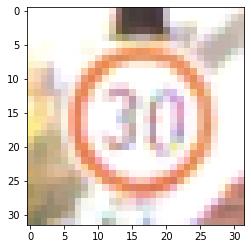

In [20]:
plt.imshow(X_test[400])

<BarContainer object of 43 artists>

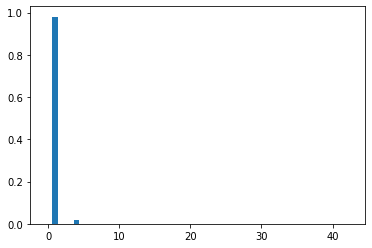

In [24]:
plt.bar(range(43), y_pred_prob[400])

In [22]:
labels_dict[ np.argmax(y_pred_prob[400]) ]

'Speed limit (30km/h)'

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [23]:
X_train_gray.reshape(-1, 32, 32, 1).shape

(34799, 32, 32, 1)

In [27]:
model = get_cnn_v6((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test, scoring=accuracy_score)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.6849 - accuracy: 0.2475 - val_loss: 0.8230 - val_accuracy: 0.7173
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.6130 - accuracy: 0.7984 - val_loss: 0.1551 - val_accuracy: 0.9521
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2644 - accuracy: 0.9134 - val_loss: 0.0528 - val_accuracy: 0.9844
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1655 - accuracy: 0.9469 - val_loss: 0.0423 - val_accuracy: 0.9869
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1173 - accuracy: 0.9625 - val_loss: 0.0193 - val_accuracy: 0.9951


0.9777777777777777

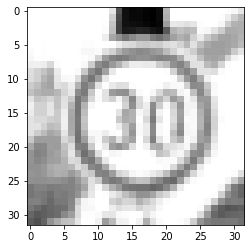

In [30]:
plt.imshow( color.rgb2gray(X_test[400]), cmap=plt.get_cmap('gray'));

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] =exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)
  return img

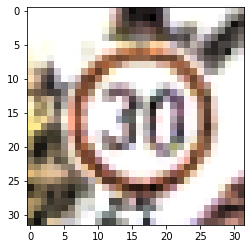

In [34]:
plt.imshow( preproc_img(X_test[400]), cmap=plt.get_cmap('gray'));

In [0]:
X_train_prp = X_train.copy().astype(np.float32)
X_test_prp = X_test.copy().astype(np.float32)

for i in tdqm(range(X_train.shape[0])):
  X_train_prp[i] = preproc_img(X_train[i]) 

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                    MaxPool2D(),
                    Dropout(0.5),
                    
                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                    MaxPool2D(),
                    Dropout(0.3),

                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dropout(0.5),
                     
                    Dense(num_classes, activation='softmax')
  ])

In [0]:
get_cnn_v2(input_shape, num_classes).summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)             

In [0]:
model = get_cnn_v2(input_shape, num_classes)
logdir = train_model(model, X_train, y_train, params_fit={'epochs': 25})

Epoch 1/25
272/272 [==============================] - 3s 10ms/step - loss: 7.3293 - accuracy: 0.1382 - val_loss: 2.8688 - val_accuracy: 0.2414
Epoch 2/25
272/272 [==============================] - 2s 9ms/step - loss: 2.2317 - accuracy: 0.3807 - val_loss: 1.1578 - val_accuracy: 0.6871
Epoch 3/25
272/272 [==============================] - 2s 9ms/step - loss: 1.3256 - accuracy: 0.6013 - val_loss: 0.6769 - val_accuracy: 0.8217
Epoch 4/25
272/272 [==============================] - 2s 9ms/step - loss: 0.9337 - accuracy: 0.7128 - val_loss: 0.3730 - val_accuracy: 0.9113
Epoch 5/25
272/272 [==============================] - 2s 9ms/step - loss: 0.6794 - accuracy: 0.7927 - val_loss: 0.2473 - val_accuracy: 0.9414
Epoch 6/25
272/272 [==============================] - 2s 9ms/step - loss: 0.5269 - accuracy: 0.8384 - val_loss: 0.1479 - val_accuracy: 0.9648
Epoch 7/25
272/272 [==============================] - 2s 9ms/step - loss: 0.4400 - accuracy: 0.8655 - val_loss: 0.1247 - val_accuracy: 0.9724
Epoch